#CODE

In [ ]:
#Import useful Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv("/train.csv")
print(data.head())
#https://www.kaggle.com/datasets/thedevastator/hate-speech-and-offensive-language-detection

   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
data["labels"]=data["class"].map({0:"Hate Speech", 1:"Offensive Speech", 2:"No Hate and Offensive Speech"})


In [ ]:
data=data[["tweet","labels"]]


In [ ]:
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech


In [ ]:
import re

In [ ]:
def clean (text):
 text = str(text).lower()
 text = re.sub('[.?]', '', text)
 text = re.sub('https?://\S+|www.\S+', '', text)
 text = re.sub('<.?>+', '', text)
 text = re.sub(r'[^\w\s]','',text)
 text = re.sub('\n', '', text)
 text = re.sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ".join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ".join(text)
 return text
data["tweet"] = data["tweet"].apply(clean)


In [ ]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [ ]:
cv=CountVectorizer()

In [ ]:
X = cv.fit_transform(x)

In [ ]:
X_train,X_text,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
model= DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_text)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8771243428291967


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

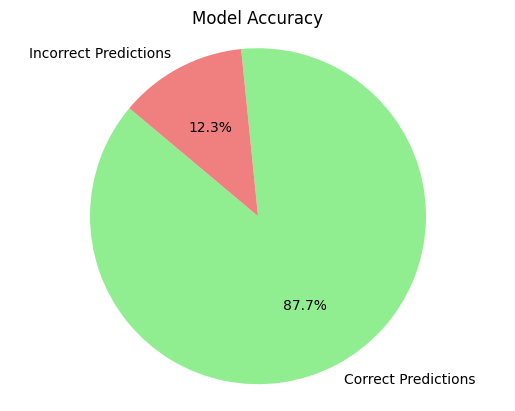

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Create data for the pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, 1-accuracy]
colors = ['lightgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Model Accuracy')
plt.show()


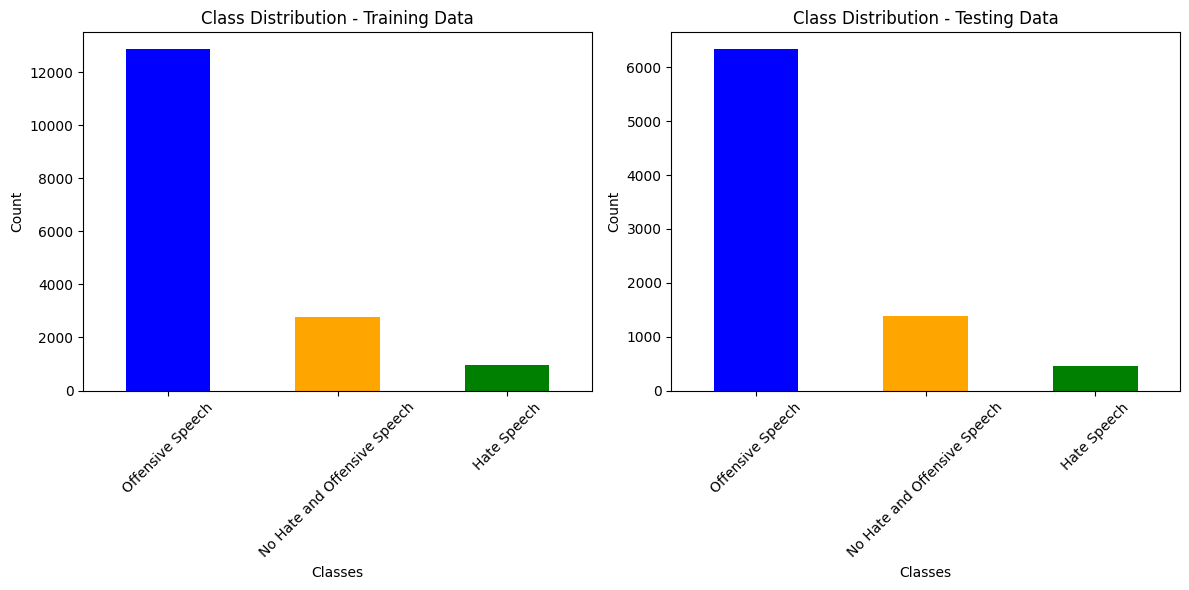

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                           train_class_distribution = pd.Series(y_train).value_counts()
test_class_distribution = pd.Series(y_test).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
train_class_distribution.plot(kind='bar', ax=ax[0], color=['blue', 'orange', 'green'])
ax[0].set_title('Class Distribution - Training Data')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)
test_class_distribution.plot(kind='bar', ax=ax[1], color=['blue', 'orange', 'green'])
ax[1].set_title('Class Distribution - Testing Data')
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
i="hello everyone"
i = cv.transform([i]).toarray()
print(model.predict((i)))

['No Hate and Offensive Speech']
